<a href="https://colab.research.google.com/github/ananya314/Lumiere_Summer_2021/blob/main/Lumiere_Summer_2021/Artemis_data_analysis/ArtEmis_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The ArtEmis Dataset

In [ ]:
!wget https://www.artemisdataset.org/materials/artemis_official_data.zip

--2021-06-26 14:23:21--  https://www.artemisdataset.org/materials/artemis_official_data.zip
Resolving www.artemisdataset.org (www.artemisdataset.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to www.artemisdataset.org (www.artemisdataset.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21842838 (21M) [application/zip]
Saving to: ‘artemis_official_data.zip’

artemis_official_da 100%[===================>]  20.83M  53.4MB/s    in 0.4s    

2021-06-26 14:23:21 (53.4 MB/s) - ‘artemis_official_data.zip’ saved [21842838/21842838]



In [ ]:
!unzip /content/artemis_official_data.zip

Archive:  /content/artemis_official_data.zip
   creating: official_data/
  inflating: official_data/ola_dataset_release_v0.csv  
  inflating: official_data/README.txt  
  inflating: official_data/artemis_dataset_release_v0.csv  


Viewing the README

In [ ]:
!cat /content/official_data/README.txt

"ArtEmis: Affective Language for Visual Art" 
	by P. Achlioptas, M. Ovsjanikov, K. Haydarov, M. Elhoseiny, L. Guibas


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
	This is a README file for the two datasets named "ArtEmis" (Art Emotions) and "OLA" (Objective Language for Art) which contain 454,684 and 5,000 annotations each.
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

A few words for ArtEmis:
	(1) the artemis_dataset_release_v0.csv has 454,684 rows and 5 rows: 	 
			'art_style', 'painting', 'emotion', 'utterance', 'repetition'

		in the standard format of the WikiArt dataset you can associate an artwork with our annotations by accessing you local directory like this: 
		<your-top-wiki-art-dir> / 'art_style' / 'painting'  + '.jpg'.

		t

In [ ]:
artemis_data = pd.read_csv("/content/official_data/artemis_dataset_release_v0.csv")

In [ ]:
artemis_data.shape

(454684, 5)

In [ ]:
pd.set_option('display.max_colwidth',1000)
artemis_data.head()

,art_style,painting,emotion,utterance,repetition
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else,"She seems very happy in the picture, and you want to know what what is behind the smile.",10
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,sadness,This woman has really knotty hands which makes her look like she has arthritis.,10
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else,"When looking at this woman, I am filled with curiosity about what she is thinking about with her elbow on the table and a very emotionless face.",10
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,contentment,"A woman looking at ease, peaceful, and satisfied amongst her books makes me feel content.",10
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,awe,She looks like a lady from that past that might have been a teacher (books). She looks tired and I wondered how hard it must have been for them back then.,10


In [ ]:
artemis_data["painting"].value_counts()

ion-pacea_midnight-sun                                                      58
jackson-pollock_number-17-1949                                              58
a.y.-jackson_spring-caribou-country-1949                                    57
paolo-veronese_perseus-freeing-andromeda-1578                               56
george-morland_thunderstorm                                                 56
                                                                            ..
vasily-surikov_seville-the-bullfight-1910                                    5
charles-cottet_marine-breton-1903                                            5
nicholas-roerich_study-of-mountains-7                                        5
vasily-sadovnikov_knight-s-hall-in-verkiai-palace-vilnius-lithuania-1846     5
morris-louis_floral-v-1960                                                   5
Name: painting, Length: 80031, dtype: int64

In [ ]:
artemis_data["art_style"].value_counts()

Impressionism                 72361
Realism                       59681
Romanticism                   39069
Expressionism                 38717
Post_Impressionism            36374
Art_Nouveau_Modern            24711
Symbolism                     24103
Baroque                       23469
Abstract_Expressionism        16075
Northern_Renaissance          14160
Naive_Art_Primitivism         14086
Rococo                        11904
Cubism                        11462
Color_Field_Painting           9836
Pop_Art                        8438
Early_Renaissance              7622
High_Renaissance               7366
Minimalism                     7163
Mannerism_Late_Renaissance     7047
Ukiyo_e                        6615
Fauvism                        4191
Contemporary_Realism           2953
Pointillism                    2870
New_Realism                    1848
Synthetic_Cubism               1284
Action_painting                 664
Analytical_Cubism               615
Name: art_style, dtype: int6

<div style="text-align: justify"> There are more descriptions for certain pieces of art compared to others. For instance, Jackson pollock's number 17, 1949, has 58 captions but  Vincent Van Gogh's Wheat Field in the Rain, 1889, has only 5 image captions. Furthermore, there is some imbalance in the number of instances of various art styles- "Impressionism" is tagged 72351 times, and "Analytical Cubism"  is tagged only 615 times.  </div>

# Setting up an example from wiki-art

In [ ]:
!wget https://uploads4.wikiart.org/images/vincent-van-gogh/portrait-of-madame-ginoux-l-arlesienne-1890.jpg!Large.jpg

--2021-06-26 14:23:24--  https://uploads4.wikiart.org/images/vincent-van-gogh/portrait-of-madame-ginoux-l-arlesienne-1890.jpg!Large.jpg
Resolving uploads4.wikiart.org (uploads4.wikiart.org)... 85.17.39.106
Connecting to uploads4.wikiart.org (uploads4.wikiart.org)|85.17.39.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64244 (63K) [image/jpg]
Saving to: ‘portrait-of-madame-ginoux-l-arlesienne-1890.jpg!Large.jpg’

portrait-of-madame- 100%[===================>]  62.74K   312KB/s    in 0.2s    

2021-06-26 14:23:24 (312 KB/s) - ‘portrait-of-madame-ginoux-l-arlesienne-1890.jpg!Large.jpg’ saved [64244/64244]



In [ ]:
# concatenating all captions for this image
captions = artemis_data.loc[artemis_data['painting'] == "vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890", 'utterance']
joined_captions = "\n".join(captions.to_numpy())

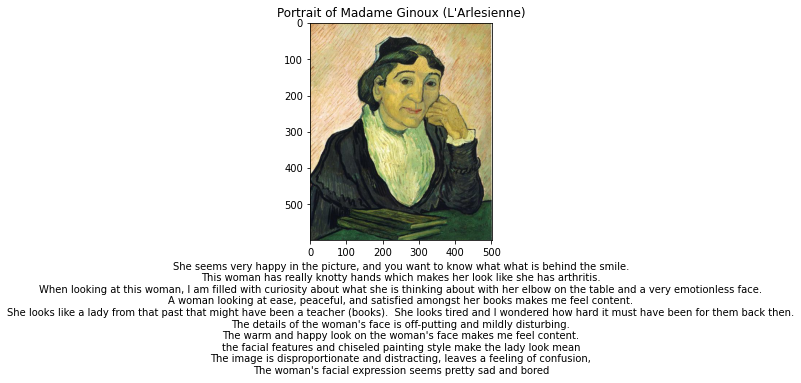

In [ ]:
img = plt.imread("/content/portrait-of-madame-ginoux-l-arlesienne-1890.jpg!Large.jpg")
plt.imshow(img)
plt.title("Portrait of Madame Ginoux (L'Arlesienne)")
plt.xlabel(joined_captions)
plt.show()

# OLA Data: Objective Descriptions

In [ ]:
ola_data = pd.read_csv("/content/official_data/ola_dataset_release_v0.csv")

In [ ]:
ola_data.shape

(5000, 3)

In [ ]:
ola_data.head()

,art_style,painting,utterance
0,Realism,ivan-shishkin_pine-forest-1884,A forest is growing by some water but trees are being cut down.
1,Ukiyo_e,utagawa-kuniyoshi_oniwakamaru-preparing-to-kill-a-giant-carp,People from a Japanese village are trying to catch a large fish.
2,Expressionism,max-pechstein_untitled-1920,A drawing with a few sailboats on the rippled water. Plus some people on the boats and walking around.
3,Baroque,canaletto_campo-santi-apostoli,A cityscape with buildings overlooking a sparsely peopled square.
4,Rococo,bernardo-bellotto_mniszech-palace-in-warsaw-1779,A busy city street filled with people riding horses and a carriage.


In [ ]:
artemis_data.isnull().sum()

art_style     0
painting      0
emotion       0
utterance     0
repetition    0
dtype: int64

In [ ]:
artemis_data["emotion"].value_counts()

contentment       126134
awe                72927
something else     52962
sadness            49061
amusement          45336
fear               41577
excitement         37636
disgust            22411
anger               6640
Name: emotion, dtype: int64

In [ ]:
artemis_data["emotion"].value_counts().sum()-72927

381757

In [ ]:
72927/artemis_data["emotion"].value_counts().sum()

0.16039051297164625

In [ ]:
126134 + 72927 + 52962 + 49061 + 45336 + 41577 + 37636 + 22411 + 6640

454684

In [ ]:
52962/454684

0.1164808966227094